In [18]:
# Import libraries
from datetime import timedelta
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [19]:
# Read the CSV file
df = pd.read_csv('mortality.csv')
df

,Unnamed: 0,subject_id,hadm_id,stay_id,charttime,heart_rate,sbp,dbp,mbp,sbp_ni,...,avg_height,death_status,age_at_admission,died_within_30_days,died_within_90_days,died_within_1_year,days_in_icu,charlson_comorbidity_index,gender_F,gender_M
0,0,10000980,26913865,39765666,2189-06-27 08:54:00,77.0,150.0,77.0,92.0,150.0,...,NaN,Deceased,76,False,False,False,6,9,True,False
1,1,10002013,23581541,39060235,2160-05-18 10:26:00,80.0,134.0,75.0,94.0,104.0,...,157.0,Alive,57,False,NaN,NaN,5,8,True,False
2,2,10002443,21329021,35044219,2183-10-18 00:50:00,81.0,136.0,81.0,99.0,136.0,...,178.0,Alive,53,False,NaN,NaN,3,4,False,True
3,3,10002495,24982426,36753294,2141-05-22 20:23:00,115.0,160.0,78.0,94.0,160.0,...,170.0,Alive,81,False,NaN,NaN,7,7,False,True
4,4,10005817,20626031,32604416,2132-12-15 10:58:00,80.0,126.0,51.0,74.0,NaN,...,173.0,Deceased,66,False,False,False,8,8,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,15417,19997473,27787494,32134105,2173-09-17 15:08:00,68.0,112.0,88.0,93.0,112.0,...,157.0,Alive,82,False,NaN,NaN,21,9,True,False
15418,15418,19997473,27787494,32568753,2173-09-13 20:12:00,87.0,115.0,70.0,81.0,115.0,...,157.0,Alive,82,False,NaN,NaN,21,9,True,False
15419,15419,19998878,26489544,34403689,2132-09-30 22:30:00,83.0,116.0,77.0,86.0,116.0,...,183.0,Deceased,56,False,False,True,2,6,False,True
15420,15420,19998878,29356037,30532790,2132-08-18 15:00:00,116.0,156.0,72.0,92.0,156.0,...,NaN,Deceased,56,False,False,True,6,6,False,True


In [20]:
df.describe()

,Unnamed: 0,subject_id,hadm_id,stay_id,heart_rate,sbp,dbp,mbp,sbp_ni,dbp_ni,...,resp_rate,temperature,spo2,glucose,los,avg_weight,avg_height,age_at_admission,days_in_icu,charlson_comorbidity_index
count,15422.000000,1.542200e+04,1.542200e+04,1.542200e+04,15413.000000,15337.000000,15337.000000,15387.000000,14082.000000,14081.000000,...,15398.000000,14984.000000,15396.000000,15196.000000,15422.000000,15411.000000,8299.000000,15422.000000,15422.000000,15422.000000
mean,7710.500000,1.496731e+07,2.498386e+07,3.496874e+07,88.271459,125.686249,67.923257,83.674530,125.309118,68.963568,...,19.448532,36.734184,96.975773,185.199322,3.517653,88.584240,169.065004,67.213656,12.367527,7.270717
std,4452.092261,2.858611e+06,2.881410e+06,2.889960e+06,19.834355,26.027201,18.309305,18.837275,26.183387,18.567617,...,6.019288,0.709607,3.735889,123.932839,4.955251,27.275021,13.742510,13.270538,15.037598,2.787048
min,0.000000,1.000098e+07,2.000009e+07,3.000021e+07,24.000000,26.000000,10.000000,1.000000,26.000000,10.000000,...,2.000000,26.670000,21.000000,11.000000,0.003519,1.000000,11.000000,18.000000,0.000000,0.000000
25%,3855.250000,1.252242e+07,2.247452e+07,3.247655e+07,75.000000,107.000000,55.000000,71.000000,106.000000,56.000000,...,15.000000,36.440000,95.000000,124.000000,1.128278,71.100000,163.000000,59.000000,5.000000,5.000000
50%,7710.500000,1.492769e+07,2.500032e+07,3.492727e+07,86.000000,124.000000,66.000000,82.000000,123.000000,67.000000,...,18.000000,36.720000,98.000000,163.000000,2.002054,85.000000,170.000000,68.000000,8.000000,7.000000
75%,11565.750000,1.742979e+07,2.747066e+07,3.745374e+07,100.000000,142.000000,78.000000,94.000000,142.000000,80.000000,...,23.000000,37.000000,100.000000,219.000000,3.806270,101.400000,178.000000,77.000000,14.000000,9.000000
max,15421.000000,1.999983e+07,2.999962e+07,3.999862e+07,247.000000,259.000000,190.000000,257.000000,259.000000,190.000000,...,69.000000,41.200000,100.000000,9999.000000,103.499005,1120.000000,439.000000,100.000000,296.000000,20.000000


In [21]:
df.isnull().sum()

Unnamed: 0                       0
subject_id                       0
hadm_id                          0
stay_id                          0
charttime                        0
heart_rate                       9
sbp                             85
dbp                             85
mbp                             35
sbp_ni                        1340
dbp_ni                        1341
mbp_ni                        1334
resp_rate                       24
temperature                    438
spo2                            26
glucose                        226
los                              0
avg_weight                      11
avg_height                    7123
death_status                     0
age_at_admission                 0
died_within_30_days              0
died_within_90_days           8506
died_within_1_year            8506
days_in_icu                      0
charlson_comorbidity_index       0
gender_F                         0
gender_M                         0
dtype: int64

In [22]:
# weight, height, died_within_days, bmi, gender, death_status, glucose

from sklearn.preprocessing import MinMaxScaler

# Replace NaN values in avg_weight and avg_height with their respective means
features_fill_nan = ['avg_weight', 'avg_height', 'glucose','heart_rate','sbp','dbp','mbp','sbp_ni','dbp_ni','mbp_ni','resp_rate','temperature','spo2','glucose','los']
for col in features_fill_nan:
    df[col].fillna(df[col].median(), inplace=True)

# Replace NaN values in died_within columns with False
columns_to_update = ['died_within_30_days', 'died_within_90_days', 'died_within_1_year']
for col in columns_to_update:
    df[col].fillna(False, inplace=True)

# Adding BMI Column
df['bmi'] = df['avg_weight'] / (df['avg_height'] / 100)**2

# Replace gender values: 'M' with 1 and 'F' with 0
df['gender_F'] = df['gender_F'].astype(str).str.strip().replace({'True': 1, 'False': 0})
df.drop(labels='gender_M',axis=1,inplace=True)

# Replace death_status values: 'Deceased' with 1 and 'Alive' with 0
df['death_status'] = df['death_status'].replace({'Deceased': 1, 'Alive': 0})

# Columns to normalize
cols_to_normalize = ['glucose','heart_rate','sbp','dbp','mbp','sbp_ni','dbp_ni','mbp_ni','resp_rate','temperature','spo2','los', 'avg_weight', 'avg_height', 'age_at_admission', 'days_in_icu', 'charlson_comorbidity_index', 'bmi']

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


for col in columns_to_update:
    df[col] = df[col].astype(str).str.strip().replace({'True': 1, 'False': 0, '<NA>': np.nan})


df

,Unnamed: 0,subject_id,hadm_id,stay_id,charttime,heart_rate,sbp,dbp,mbp,sbp_ni,...,avg_height,death_status,age_at_admission,died_within_30_days,died_within_90_days,died_within_1_year,days_in_icu,charlson_comorbidity_index,gender_F,bmi
0,0,10000980,26913865,39765666,2189-06-27 08:54:00,0.237668,0.532189,0.372222,0.355469,0.532189,...,0.371495,1,0.707317,0,0,0,0.020270,0.45,1,0.002789
1,1,10002013,23581541,39060235,2160-05-18 10:26:00,0.251121,0.463519,0.361111,0.363281,0.334764,...,0.341121,0,0.475610,0,0,0,0.016892,0.40,1,0.004313
2,2,10002443,21329021,35044219,2183-10-18 00:50:00,0.255605,0.472103,0.394444,0.382812,0.472103,...,0.390187,0,0.426829,0,0,0,0.010135,0.20,0,0.005201
3,3,10002495,24982426,36753294,2141-05-22 20:23:00,0.408072,0.575107,0.377778,0.363281,0.575107,...,0.371495,0,0.768293,0,0,0,0.023649,0.35,0,0.002343
4,4,10005817,20626031,32604416,2132-12-15 10:58:00,0.251121,0.429185,0.227778,0.285156,0.416309,...,0.378505,1,0.585366,0,0,0,0.027027,0.40,0,0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,15417,19997473,27787494,32134105,2173-09-17 15:08:00,0.197309,0.369099,0.433333,0.359375,0.369099,...,0.341121,0,0.780488,0,0,0,0.070946,0.45,1,0.002732
15418,15418,19997473,27787494,32568753,2173-09-13 20:12:00,0.282511,0.381974,0.333333,0.312500,0.381974,...,0.341121,0,0.780488,0,0,0,0.070946,0.45,1,0.002732
15419,15419,19998878,26489544,34403689,2132-09-30 22:30:00,0.264574,0.386266,0.372222,0.332031,0.386266,...,0.401869,1,0.463415,0,0,1,0.006757,0.30,0,0.002843
15420,15420,19998878,29356037,30532790,2132-08-18 15:00:00,0.412556,0.557940,0.344444,0.355469,0.557940,...,0.371495,1,0.463415,0,0,1,0.020270,0.30,0,0.003426


In [23]:
# df.drop(columns=['hadm_id','subject_id', 'stay_id','Unnamed: 0','charttime'], axis=1, inplace=True)
df.drop(columns=['hadm_id','subject_id', 'stay_id','Unnamed: 0','charttime', 'avg_weight', 'avg_height','sbp_ni','dbp_ni','mbp_ni','death_status'], axis=1, inplace=True)
df.describe()

,heart_rate,sbp,dbp,mbp,resp_rate,temperature,spo2,glucose,los,age_at_admission,died_within_30_days,died_within_90_days,died_within_1_year,days_in_icu,charlson_comorbidity_index,gender_F,bmi
count,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000
mean,0.288207,0.427798,0.321737,0.322933,0.260392,0.692621,0.961741,0.017408,0.033954,0.600167,0.145053,0.188821,0.284788,0.041782,0.363536,0.416613,0.003495
std,0.088918,0.111398,0.101441,0.073500,0.089774,0.048139,0.047253,0.012320,0.047879,0.161836,0.352165,0.391379,0.451328,0.050803,0.139352,0.493013,0.011310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.228700,0.347639,0.250000,0.273438,0.194030,0.672402,0.936709,0.011314,0.010868,0.500000,0.000000,0.000000,0.000000,0.016892,0.250000,0.000000,0.002640
50%,0.278027,0.420601,0.311111,0.316406,0.238806,0.691672,0.974684,0.015218,0.019310,0.609756,0.000000,0.000000,0.000000,0.027027,0.350000,0.000000,0.003115
75%,0.340807,0.497854,0.377778,0.363281,0.313433,0.710943,1.000000,0.020725,0.036743,0.719512,0.000000,0.000000,1.000000,0.047297,0.450000,1.000000,0.003702
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define predictors and target
X = df.drop(columns=['died_within_30_days', 'died_within_90_days', 'died_within_1_year'])
y_30 = df['died_within_30_days']
y_90 = df['died_within_90_days']
y_year = df['died_within_1_year']

# Split data into training and test sets
X_train, X_test, y_30_train, y_30_test = train_test_split(X, y_30, test_size=0.2, random_state=42)
_, _, y_90_train, y_90_test = train_test_split(X, y_90, test_size=0.2, random_state=42)
_, _, y_year_train, y_year_test = train_test_split(X, y_year, test_size=0.2, random_state=42)

# Train a RandomForest classifier for each time frame
# max_depth 10 performs not well, 100 performs best
# n_estimator 100 performs best - 0.16, 50 and 500 both 0.14

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

In [26]:
from sklearn.metrics import balanced_accuracy_score


In [35]:
# Predicting Death within 30 Days

# Baseline
dummy_clf = DummyClassifier(strategy="uniform", random_state=42).fit(X_train, y_30_train)
y_30_pred_dummy = dummy_clf.predict(X_test)

# Logistic Regression
clf_30_logreg = LogisticRegression(C=1, max_iter=1000, penalty='l2', solver='liblinear', random_state=42, class_weight='balanced').fit(X_train, y_30_train)
y_30_pred_logreg = clf_30_logreg.predict(X_test)

# SVM (with radial basis function kernel)
clf_30_svm = SVC(C=0.01, kernel='rbf',gamma='scale',class_weight='balanced', random_state=42).fit(X_train, y_30_train)
y_30_pred_svm = clf_30_svm.predict(X_test)

# K-Nearest Neighbors (using 3 neighbors)
clf_30_knn = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(X_train, y_30_train)
y_30_pred_knn = clf_30_knn.predict(X_test)

# K-Nearest Neighbors (using 5 neighbors)
clf_30_knn_5 = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train, y_30_train)
y_30_pred_knn_5 = clf_30_knn_5.predict(X_test)

# Gradient Boosting Classifier
clf_30_gb = GradientBoostingClassifier(random_state=42,n_estimators=1000,learning_rate=0.5,max_depth=1000).fit(X_train, y_30_train)
y_30_pred_gb = clf_30_gb.predict(X_test)

# Random Forest
clf_30 = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42,bootstrap=True).fit(X_train, y_30_train)
y_30_pred = clf_30.predict(X_test)

# Predicting Death within 90 Days

# Baseline
dummy_90_clf = DummyClassifier(strategy="uniform", random_state=42).fit(X_train, y_90_train)
y_90_pred_dummy = dummy_90_clf.predict(X_test)

# Logistic Regression
clf_90_logreg = LogisticRegression(C=1, max_iter=1000, penalty='l2', solver='liblinear', random_state=42, class_weight='balanced').fit(X_train, y_90_train)
y_90_pred_logreg = clf_90_logreg.predict(X_test)

# SVM (with radial basis function kernel)
clf_90_svm = SVC(C=0.01, kernel='rbf',gamma='scale',class_weight='balanced', random_state=42).fit(X_train, y_90_train)
y_90_pred_svm = clf_90_svm.predict(X_test)

# K-Nearest Neighbors
clf_90_knn = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(X_train, y_90_train)
y_90_pred_knn = clf_90_knn.predict(X_test)

# K-Nearest Neighbors (using 5 neighbors)
clf_90_knn_5 = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train, y_90_train)
y_90_pred_knn_5 = clf_90_knn_5.predict(X_test)

# Gradient Boosting Classifier
clf_90_gb = GradientBoostingClassifier(random_state=42,n_estimators=1000,learning_rate=0.5,max_depth=1000).fit(X_train, y_90_train)
y_90_pred_gb = clf_90_gb.predict(X_test)

# Random Forest
clf_90 = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42,bootstrap=True).fit(X_train, y_90_train)
y_90_pred = clf_90.predict(X_test)

# Predicting Death within 1 Year

# Baseline
dummy_1y_clf = DummyClassifier(strategy="uniform", random_state=42).fit(X_train, y_year_train)
y_1y_pred_dummy = dummy_1y_clf.predict(X_test)

# Logistic Regression
clf_1y_logreg = LogisticRegression(C=1, max_iter=1000, penalty='l2', solver='liblinear', random_state=42, class_weight='balanced').fit(X_train, y_year_train)
y_1y_pred_logreg = clf_1y_logreg.predict(X_test)

# SVM (with radial basis function kernel)
clf_1y_svm = SVC(C=0.01, kernel='rbf',gamma='scale',class_weight='balanced', random_state=42).fit(X_train, y_year_train)
y_1y_pred_svm = clf_1y_svm.predict(X_test)

# K-Nearest Neighbors
clf_1y_knn = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(X_train, y_year_train)
y_1y_pred_knn = clf_1y_knn.predict(X_test)

# K-Nearest Neighbors (using 5 neighbors)
clf_1y_knn_5 = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train, y_year_train)
y_1y_pred_knn_5 = clf_1y_knn_5.predict(X_test)

# Gradient Boosting Classifier
clf_1y_gb = GradientBoostingClassifier(random_state=42,n_estimators=1000,learning_rate=0.5,max_depth=1000).fit(X_train, y_year_train)
y_1y_pred_gb = clf_1y_gb.predict(X_test)

# Random Forest
clf_year = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42,bootstrap=True).fit(X_train, y_year_train)
y_year_pred = clf_year.predict(X_test)

# Evaluate the models
print("Baseline - 30 Days Prediction:")
print(balanced_accuracy_score(y_30_test, y_30_pred_dummy))
print(classification_report(y_30_test, y_30_pred_dummy))

print("Logistic Regression - 30 Days Prediction:")
print(balanced_accuracy_score(y_30_test, y_30_pred_logreg))
print(classification_report(y_30_test, y_30_pred_logreg))

print("SVM - 30 Days Prediction:")
print(balanced_accuracy_score(y_30_test, y_30_pred_svm))
print(classification_report(y_30_test, y_30_pred_svm))

print("KNN - 30 Days Prediction:")
print(accuracy_score(y_30_test, y_30_pred_knn))
print(classification_report(y_30_test, y_30_pred_knn))

print("KNN-5 - 30 Days Prediction:")
print(accuracy_score(y_30_test, y_30_pred_knn_5))
print(classification_report(y_30_test, y_30_pred_knn_5))

print("Gradient Boosting - 30 Days Prediction:")
print(accuracy_score(y_30_test, y_30_pred_gb))
print(classification_report(y_30_test, y_30_pred_gb))

print("Random Forest - 30 Days Prediction:")
print(accuracy_score(y_30_test, y_30_pred))
print(classification_report(y_30_test, y_30_pred))

# Evaluating 90 days prediction models
print("Dummy - 90 Days Prediction:")
print(balanced_accuracy_score(y_90_test, y_90_pred_dummy))
print(classification_report(y_90_test, y_90_pred_dummy))

print("Logistic Regression - 90 Days Prediction:")
print(balanced_accuracy_score(y_90_test, y_90_pred_logreg))
print(classification_report(y_90_test, y_90_pred_logreg))

print("SVM - 90 Days Prediction:")
print(balanced_accuracy_score(y_90_test, y_90_pred_svm))
print(classification_report(y_90_test, y_90_pred_svm))

print("KNN - 90 Days Prediction:")
print(accuracy_score(y_90_test, y_90_pred_knn))
print(classification_report(y_90_test, y_90_pred_knn))

print("KNN-5 - 90 Days Prediction:")
print(accuracy_score(y_90_test, y_90_pred_knn_5))
print(classification_report(y_90_test, y_90_pred_knn_5))

print("Gradient Boosting - 90 Days Prediction:")
print(accuracy_score(y_90_test, y_90_pred_gb))
print(classification_report(y_90_test, y_90_pred_gb))

print("Random Forest - 90 Days Prediction:")
print(accuracy_score(y_90_test, y_90_pred))
print(classification_report(y_90_test, y_90_pred))

# Evaluating 1 year prediction models
print("Dummy - 1 Year Prediction:")
print(balanced_accuracy_score(y_year_test, y_1y_pred_dummy))
print(classification_report(y_year_test, y_1y_pred_dummy))

print("Logistic Regression - 1 Year Prediction:")
print(balanced_accuracy_score(y_year_test, y_1y_pred_logreg))
print(classification_report(y_year_test, y_1y_pred_logreg))

print("SVM - 1 Year Prediction:")
print(balanced_accuracy_score(y_year_test, y_1y_pred_svm))
print(classification_report(y_year_test, y_1y_pred_svm))

print("KNN - 1 Year Prediction:")
print(accuracy_score(y_year_test, y_1y_pred_knn))
print(classification_report(y_year_test, y_1y_pred_knn))

print("KNN-5 - 1 Year Prediction:")
print(accuracy_score(y_year_test, y_1y_pred_knn_5))
print(classification_report(y_year_test, y_1y_pred_knn_5))

print("Gradient Boosting - 1 Year Prediction:")
print(accuracy_score(y_year_test, y_1y_pred_gb))
print(classification_report(y_year_test, y_1y_pred_gb))

print("Random Forest - 1 Year Prediction:")
print(accuracy_score(y_year_test, y_year_pred))
print(classification_report(y_year_test, y_year_pred))

Baseline - 30 Days Prediction:
0.5129417947707267
              precision    recall  f1-score   support

           0       0.87      0.51      0.64      2655
           1       0.15      0.52      0.23       430

    accuracy                           0.51      3085
   macro avg       0.51      0.51      0.43      3085
weighted avg       0.77      0.51      0.58      3085



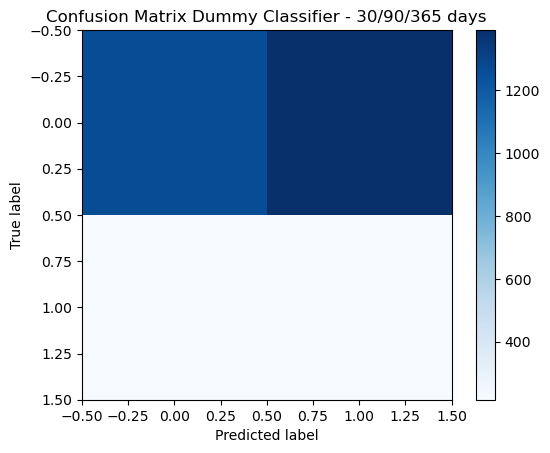

In [28]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Your data
y_test = y_30_test  # True labels
y_pred = y_30_pred_dummy  # Predicted labels

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix Dummy Classifier - 30/90/365 days')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

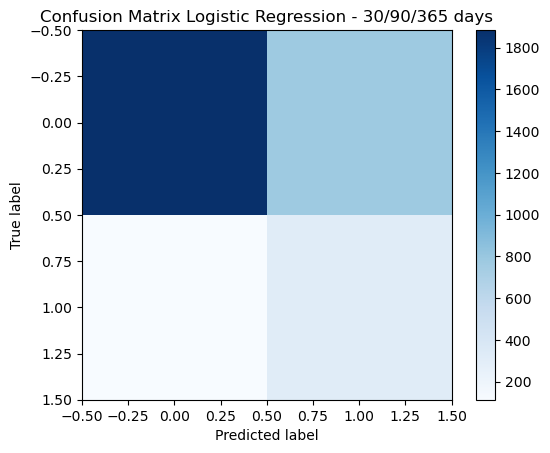

In [29]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Your data
y_test = y_30_test  # True labels
y_pred = y_30_pred_logreg  # Predicted labels

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix Logistic Regression - 30/90/365 days')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

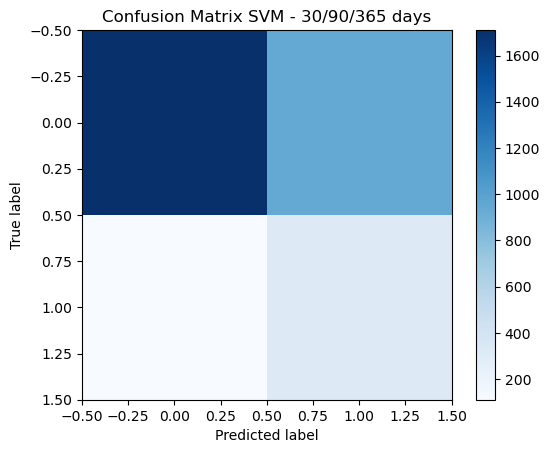

In [30]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Your data
y_test = y_30_test  # True labels
y_pred = y_30_pred_svm  # Predicted labels

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix SVM - 30/90/365 days')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

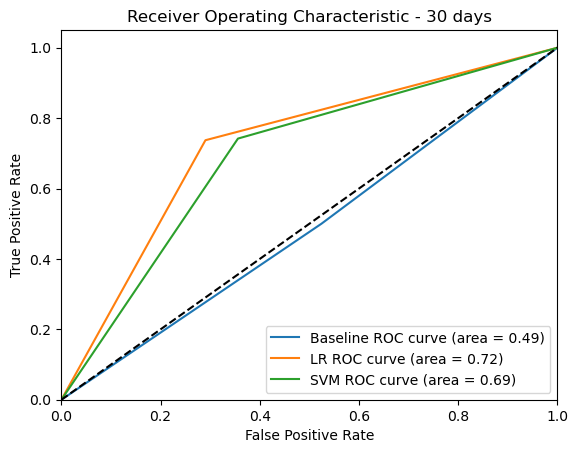

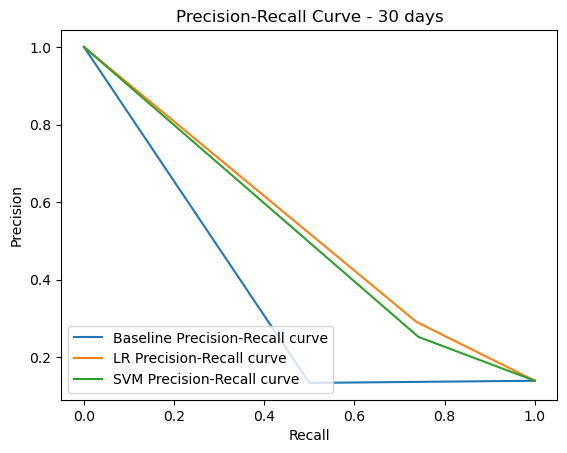

In [31]:
# Your data
y_test = y_30_test         # True labels
y_pred1 = y_30_pred_dummy  # Predicted labels from Model 1
y_pred2 = y_30_pred_logreg # Predicted labels from Model 2
y_pred3 = y_30_pred_svm # Predicted labels from Model 3

# ROC Curve for multiple models
fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)

plt.figure()
plt.plot(fpr1, tpr1, label=f'Baseline ROC curve (area = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'LR ROC curve (area = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'SVM ROC curve (area = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - 30 days')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve for multiple models
precision1, recall1, _ = precision_recall_curve(y_test, y_pred1)
precision2, recall2, _ = precision_recall_curve(y_test, y_pred2)
precision3, recall3, _ = precision_recall_curve(y_test, y_pred3)

plt.figure()
plt.plot(recall1, precision1, label='Baseline Precision-Recall curve')
plt.plot(recall2, precision2, label='LR Precision-Recall curve')
plt.plot(recall3, precision3, label='SVM Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - 30 days')
plt.legend(loc="lower left")
plt.show()

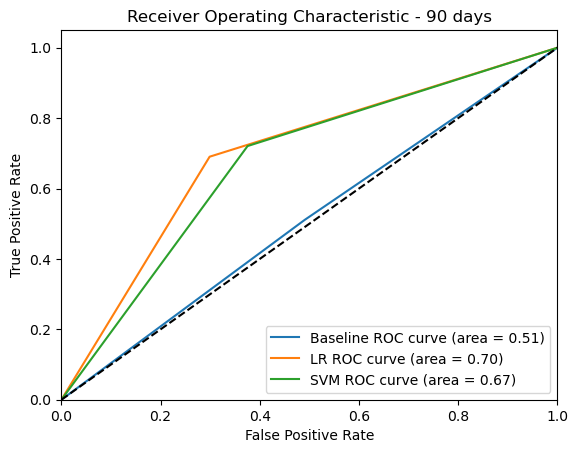

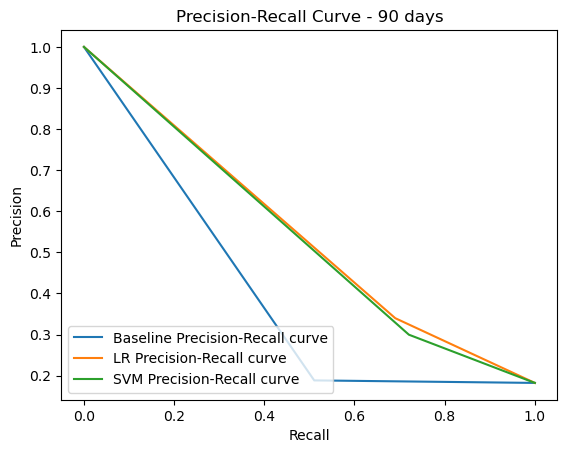

In [32]:
# Your data
y_test = y_90_test         # True labels
y_pred1 = y_90_pred_dummy  # Predicted labels from Model 1
y_pred2 = y_90_pred_logreg # Predicted labels from Model 2
y_pred3 = y_90_pred_svm # Predicted labels from Model 3

# ROC Curve for multiple models
fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)

plt.figure()
plt.plot(fpr1, tpr1, label=f'Baseline ROC curve (area = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'LR ROC curve (area = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'SVM ROC curve (area = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - 90 days')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve for multiple models
precision1, recall1, _ = precision_recall_curve(y_test, y_pred1)
precision2, recall2, _ = precision_recall_curve(y_test, y_pred2)
precision3, recall3, _ = precision_recall_curve(y_test, y_pred3)

plt.figure()
plt.plot(recall1, precision1, label='Baseline Precision-Recall curve')
plt.plot(recall2, precision2, label='LR Precision-Recall curve')
plt.plot(recall3, precision3, label='SVM Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - 90 days')
plt.legend(loc="lower left")
plt.show()

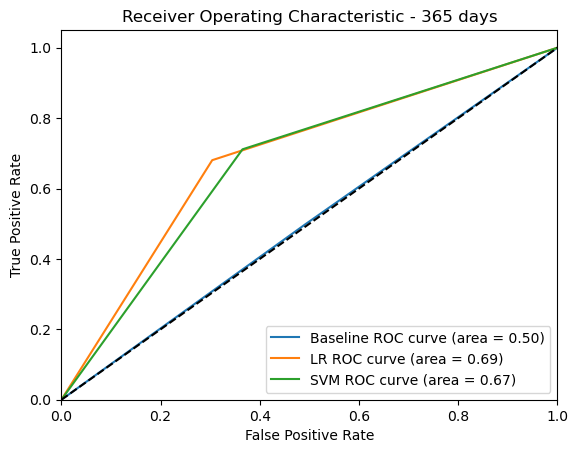

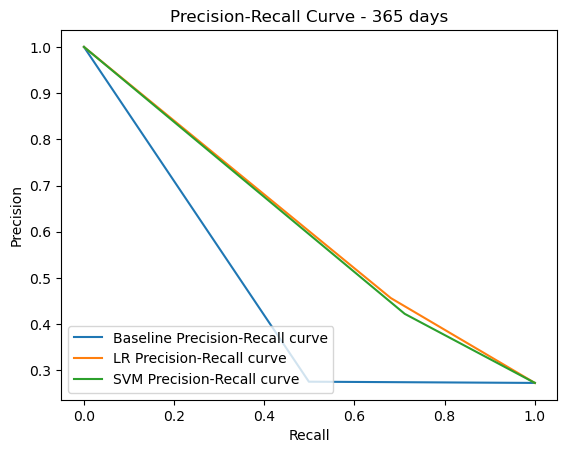

In [33]:
# Your data
y_test = y_year_test         # True labels
y_pred1 = y_1y_pred_dummy  # Predicted labels from Model 1
y_pred2 = y_1y_pred_logreg # Predicted labels from Model 2
y_pred3 = y_1y_pred_svm # Predicted labels from Model 3

# ROC Curve for multiple models
fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)

plt.figure()
plt.plot(fpr1, tpr1, label=f'Baseline ROC curve (area = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'LR ROC curve (area = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'SVM ROC curve (area = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - 365 days')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve for multiple models
precision1, recall1, _ = precision_recall_curve(y_test, y_pred1)
precision2, recall2, _ = precision_recall_curve(y_test, y_pred2)
precision3, recall3, _ = precision_recall_curve(y_test, y_pred3)

plt.figure()
plt.plot(recall1, precision1, label='Baseline Precision-Recall curve')
plt.plot(recall2, precision2, label='LR Precision-Recall curve')
plt.plot(recall3, precision3, label='SVM Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - 365 days')
plt.legend(loc="lower left")
plt.show()